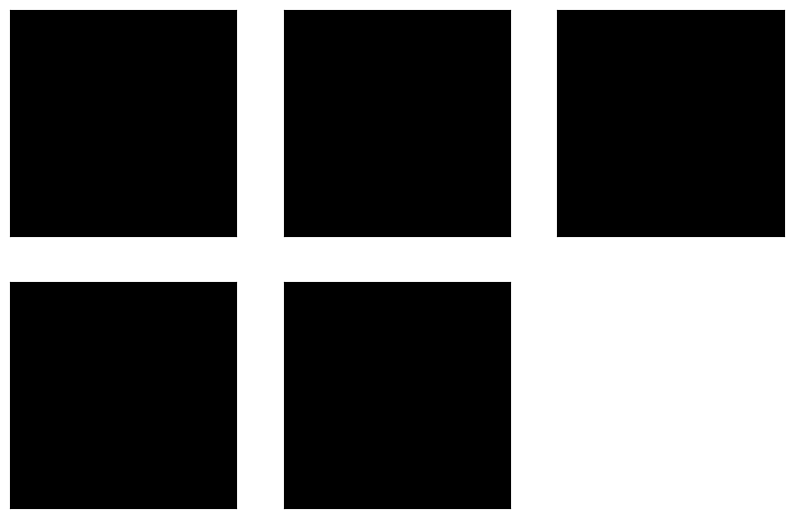

Contrast augmentation complete.


In [47]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
img_size = 150
data_dir1 = '../../../chest_xray/train/PNEUMONIA'
data_dir2 = '../../../chest_xray/train/NORMAL'

# Function to load data
def load_data(data_dir1, data_dir2):
    data = []
    
    # Load data for PNEUMONIA class
    for img in os.listdir(data_dir1):
        try:
            img_arr = cv2.imread(os.path.join(data_dir1, img), cv2.IMREAD_GRAYSCALE)
            if img_arr is None:
                print(f"Failed to read {img}. Skipping.")
                continue
            resized_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append([resized_arr, 0])  # 0 represents PNEUMONIA class
        except Exception as e:
            print(e)
    
    # Load data for NORMAL class
    for img in os.listdir(data_dir2):
        try:
            img_arr = cv2.imread(os.path.join(data_dir2, img), cv2.IMREAD_GRAYSCALE)
            if img_arr is None:
                print(f"Failed to read {img}. Skipping.")
                continue
            resized_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append([resized_arr, 1])  # 1 represents NORMAL class
        except Exception as e:
            print(e)
    
    return np.array(data, dtype=object)

train_data = load_data(data_dir1, data_dir2)

# Separate features and labels
def separate_features_labels(data):
    features, labels = [], []
    for feature, label in data:
        features.append(feature)
        labels.append(label)
    return np.array(features), np.array(labels)

x_train, y_train = separate_features_labels(train_data)

# Normalize the data
x_train = x_train / 255.0
x_train = x_train.reshape(-1, img_size, img_size, 1)

# Ensure data is not empty
if x_train.size == 0 or y_train.size == 0:
    print("Training data is empty. Please check the data loading process.")
else:
    # Data augmentation - contrast
    datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        brightness_range=[0.2, 1.0]
    )

    datagen.fit(x_train)

    # Display some augmented images
    def display_augmented_images(datagen, x_train, y_train):
        plt.figure(figsize=(10, 10))
        for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=5):
            for i in range(0, 5):
                if i >= len(x_batch):
                    print("Batch size is smaller than expected.")
                    break
                plt.subplot(330 + 1 + i)
                plt.xticks([])
                plt.yticks([])
                plt.imshow(x_batch[i].reshape(img_size, img_size), cmap='gray')
            break
        plt.show()

    display_augmented_images(datagen, x_train, y_train)

    print("Contrast augmentation complete.")